In [10]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Projects/python/drugs/drugsComTrain_raw.csv")

In [3]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [4]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [5]:
list(df['condition'].unique())

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 nan,
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'S

In [6]:
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokenized_words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokenized_words]
    processed_text = ' '.join(stemmed_words)
    return processed_text


df['review'] = df['review'].apply(preprocess_text)

print(df)

        uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating       date  \
0      

In [7]:
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'

contains_special_chars = df['review'].str.contains(special_chars_pattern, regex=True)

print(contains_special_chars.sum())

0


In [8]:
df['condition'] = df['condition'].apply(lambda x: None if pd.isnull(x) or ('</span>' in x) else x)

print(df)

        uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating       date  \
0      

In [9]:
df.isnull().sum()

uniqueID          0
drugName          0
condition      1799
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [10]:
df[df['condition'].isnull()]

,uniqueID,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,None,veri good respons it is so use for me,10,18-Aug-10,1
105,220696,Loestrin 24 Fe,None,im and i have been on loestrin for about a wee...,3,3-Nov-10,2
148,61073,Urea,None,accur inform,10,2-Jul-11,13
196,67383,Provera,None,im year old and have alway had a pretti regula...,1,27-Mar-16,4
243,81588,Yaz,None,i took yaz for a littl over year from around t...,3,1-Jun-10,3
...,...,...,...,...,...,...,...
160791,150010,Soma,None,i am share a pain experi actual thi is truth t...,5,11-Mar-10,62
160841,150516,Sulfamethoxazole / trimethoprim,None,given a day cours after day insomnia anxieti c...,4,28-Sep-16,3
160899,209239,Geodon,None,ive been take geodon for about a month or so n...,7,4-Feb-11,7
160921,96527,Neurontin,None,at mg x daili my pain wa almost gone,9,8-Jul-13,92


In [11]:
df['reviewLength'] = df.review.apply(lambda x: len(x.split()))

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.to_csv('drugs_cleaned.csv', index=False)

In [2]:
df_cleaned = pd.read_csv("drugs_cleaned.csv")

In [3]:
df_cleaned

,uniqueID,drugName,condition,review,rating,date,usefulCount,reviewLength
0,206461,Valsartan,Left Ventricular Dysfunction,it ha no side effect i take it in combin of by...,9,2012-05-20,27,16
1,95260,Guanfacine,ADHD,my son is halfway through hi fourth week of in...,8,2010-04-27,192,140
2,92703,Lybrel,Birth Control,i use to take anoth oral contracept which had ...,5,2009-12-14,17,132
3,138000,Ortho Evra,Birth Control,thi is my first time use ani form of birth con...,8,2015-11-03,10,86
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxon ha complet turn my life around i feel ...,9,2016-11-27,37,124
...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,i wrote my first report in midoctob of i have ...,10,2015-05-31,125,123
161293,127085,Metoclopramide,Nausea/Vomiting,i wa given thi in iv befor surgey i immedi bec...,1,2011-11-01,34,48
161294,187382,Orencia,Rheumatoid Arthritis,limit improv after month develop bad rash and ...,2,2014-03-15,35,13
161295,47128,Thyroid desiccated,Underactive Thyroid,ive been on thyroid medic year i spent my firs...,10,2015-09-19,79,134


In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   uniqueID      161297 non-null  int64 
 1   drugName      161297 non-null  object
 2   condition     159498 non-null  object
 3   review        161295 non-null  object
 4   rating        161297 non-null  int64 
 5   date          161297 non-null  object
 6   usefulCount   161297 non-null  int64 
 7   reviewLength  161297 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 9.8+ MB


In [5]:
df_cleaned.describe()

,uniqueID,rating,usefulCount,reviewLength
count,161297.000000,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755,82.701842
std,67004.445170,3.272329,36.403742,44.111702
min,2.000000,1.000000,0.000000,0.000000
25%,58063.000000,5.000000,6.000000,47.000000
50%,115744.000000,8.000000,16.000000,82.000000
75%,173776.000000,10.000000,36.000000,123.000000
max,232291.000000,10.000000,1291.000000,1868.000000


In [6]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

In [7]:
df_cleaned['year']= df_cleaned['date'].dt.year

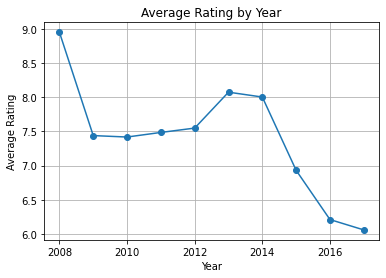

In [8]:
average_ratings=df_cleaned.groupby('year')['rating'].mean()
average_ratings.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.grid(True)
plt.show()

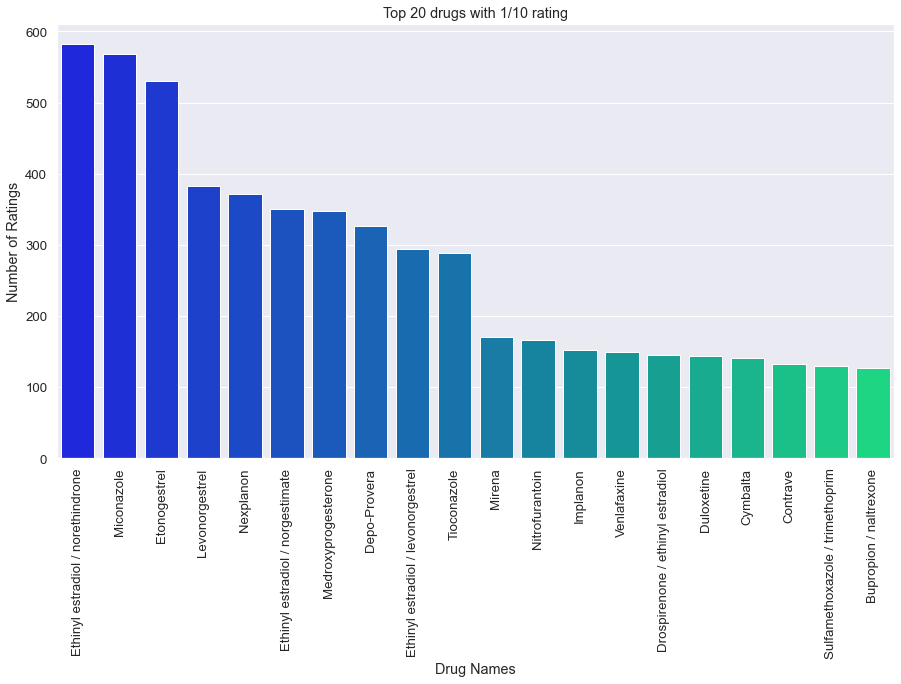

In [11]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_cleaned.loc[df_cleaned.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

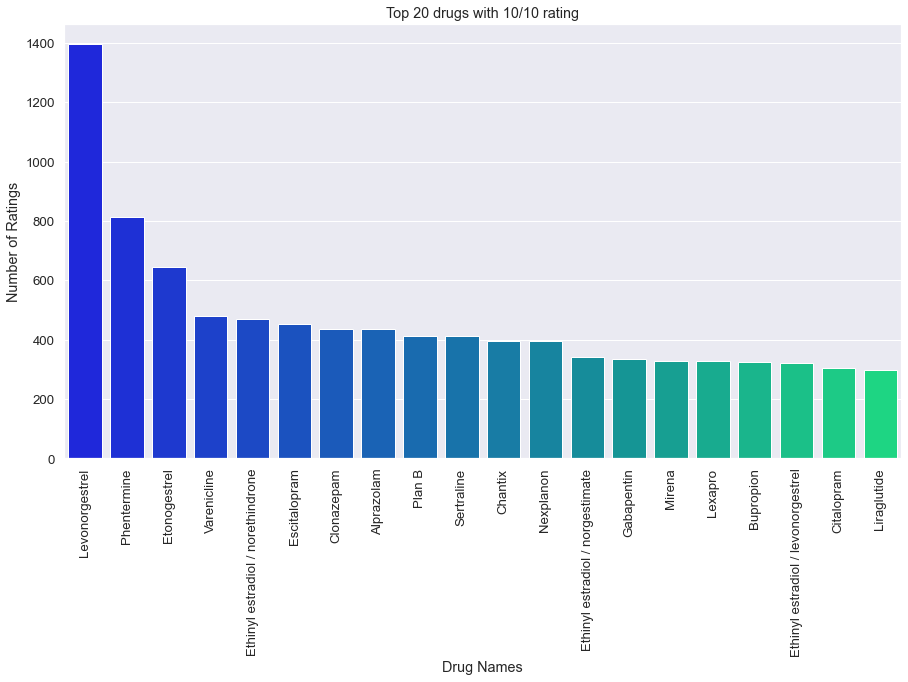

In [12]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_cleaned.loc[df_cleaned.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

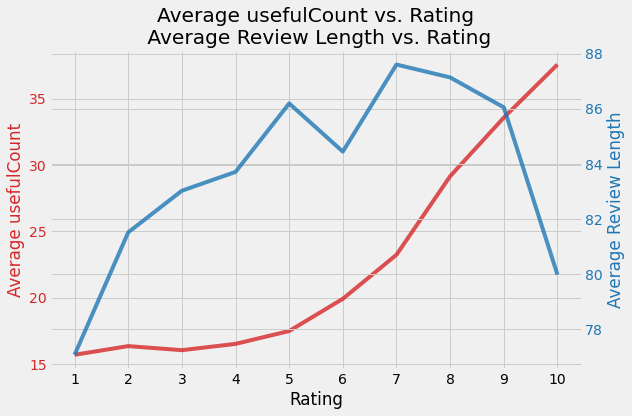

In [25]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(9,6))
t = range(1,11)

color = 'tab:red'
ax1.set_xlabel('Rating')
ax1.set_ylabel('Average usefulCount', color=color)
ax1.plot(t, df_cleaned.groupby('rating').usefulCount.mean(), color=color, alpha=0.8)
ax1.set_xticks(range(1,11))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Average usefulCount vs. Rating\n Average Review Length vs. Rating')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Average Review Length', color=color)
ax2.plot(t, df.groupby('rating').reviewLength.mean(), color=color, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

In [26]:
drugs_2008 = df_cleaned[(df_cleaned['year']==2008)]

In [27]:
drugs_2008

,uniqueID,drugName,condition,review,rating,date,usefulCount,reviewLength,year
42,173398,Clonazepam,Panic Disorde,thi medic chang my life my panic attack were s...,9,2008-04-01,30,43,2008
91,187720,Augmentin XR,Skin and Structure Infection,had a cat bite me on my handful set of teeth a...,9,2008-12-13,37,132,2008
142,8051,Xanax,Panic Disorde,mg of xanax work perfectli for my panic attack...,10,2008-07-23,41,36,2008
228,232066,Trazodone,Depression,it ha work so far for me and i would recommend...,7,2008-07-25,99,17,2008
263,213019,Tizanidine,Muscle Spasm,i am veri happi take zanaflex i wa origin put ...,10,2008-08-28,80,42,2008
...,...,...,...,...,...,...,...,...,...
160961,95067,Abilify,Bipolar Disorde,i think thi is a great medic for bipolar,8,2008-04-06,43,9,2008
160998,88586,Adderall,ADHD,adderal is amaz it realli work ive never reall...,8,2008-10-02,50,31,2008
161027,122208,Venlafaxine,Anxiety and Stress,i have been on effexor for over a year and my ...,9,2008-12-15,69,42,2008
161125,23507,Methadone,Pain,i wa on oxycontin mg x a day but had to increa...,8,2008-07-25,44,89,2008


<b>Highest Count Of Drug used by customer in 2008<b>
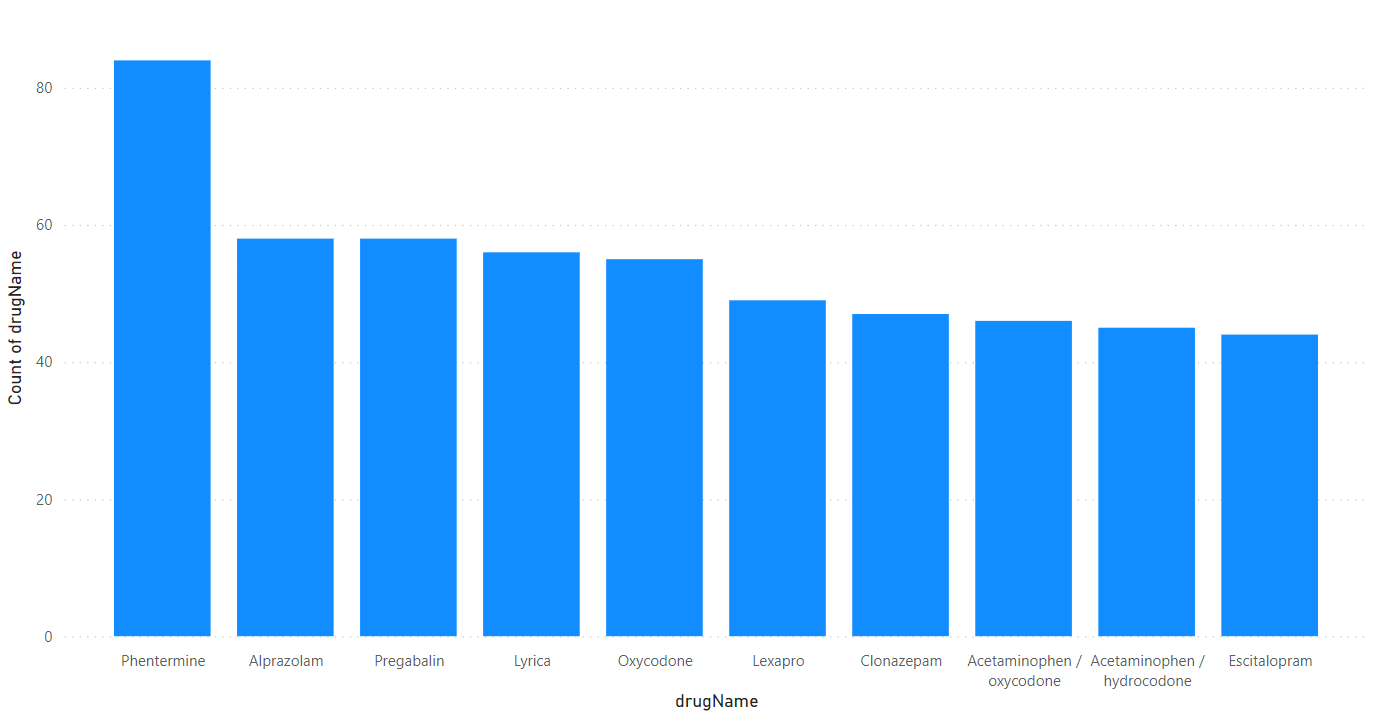

<b> Rating of the above highly used Drugs in 2008</b>
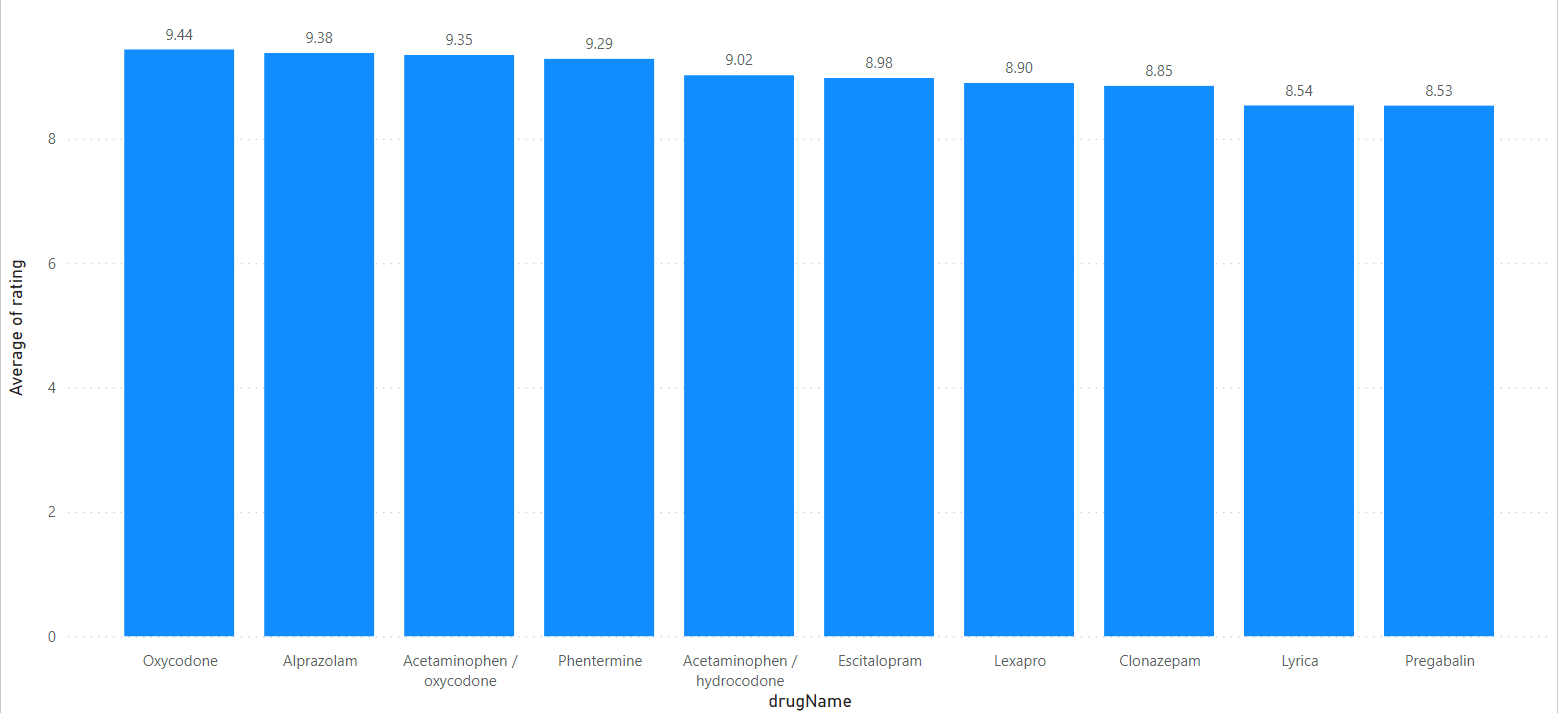

<b>Most Suffered Condition in 2008</b>
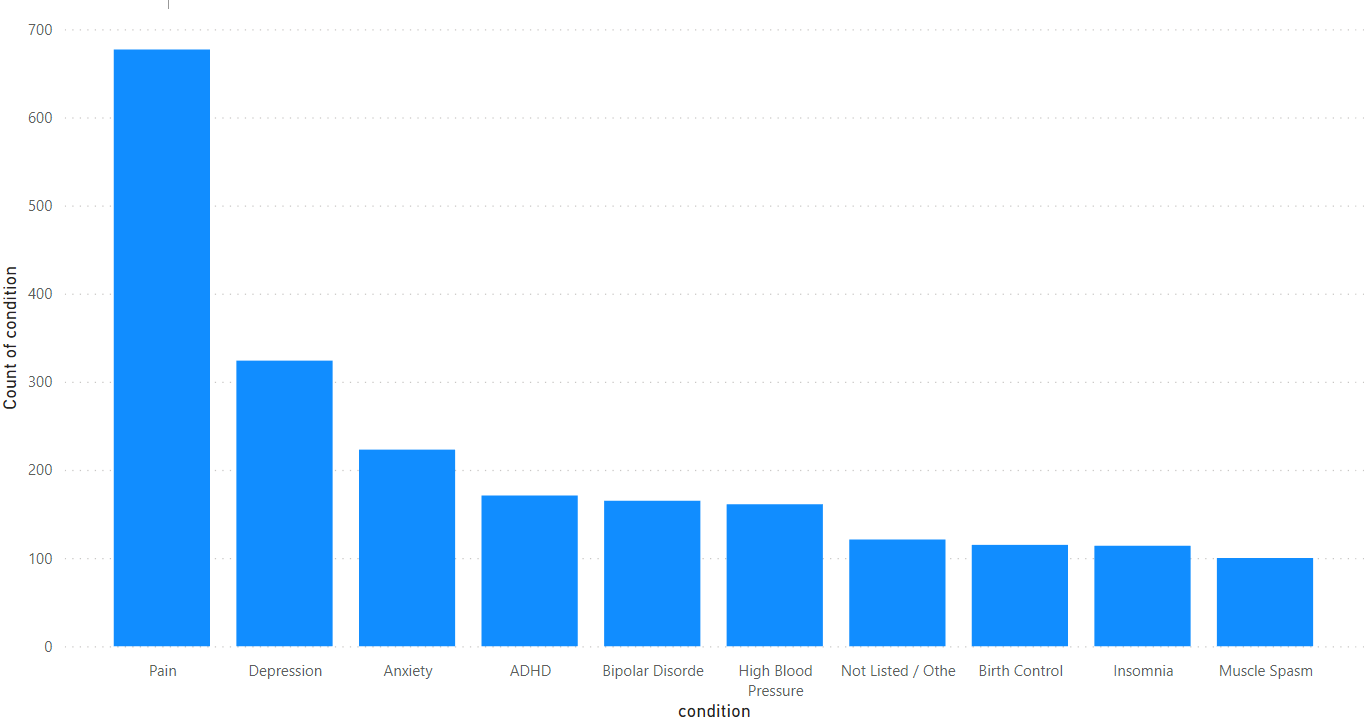

<b> Top Performing drugs for highest suffered condition -> Pain </b>
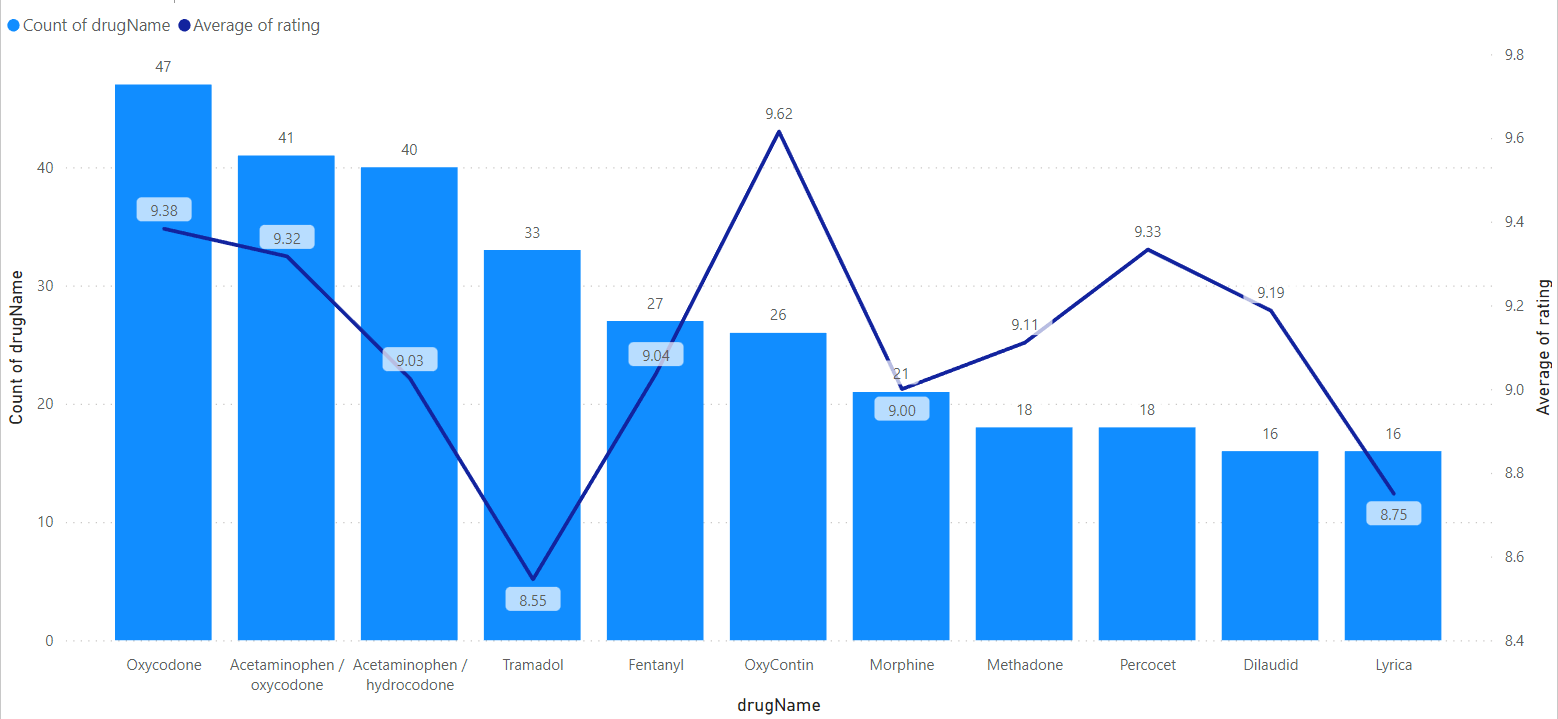

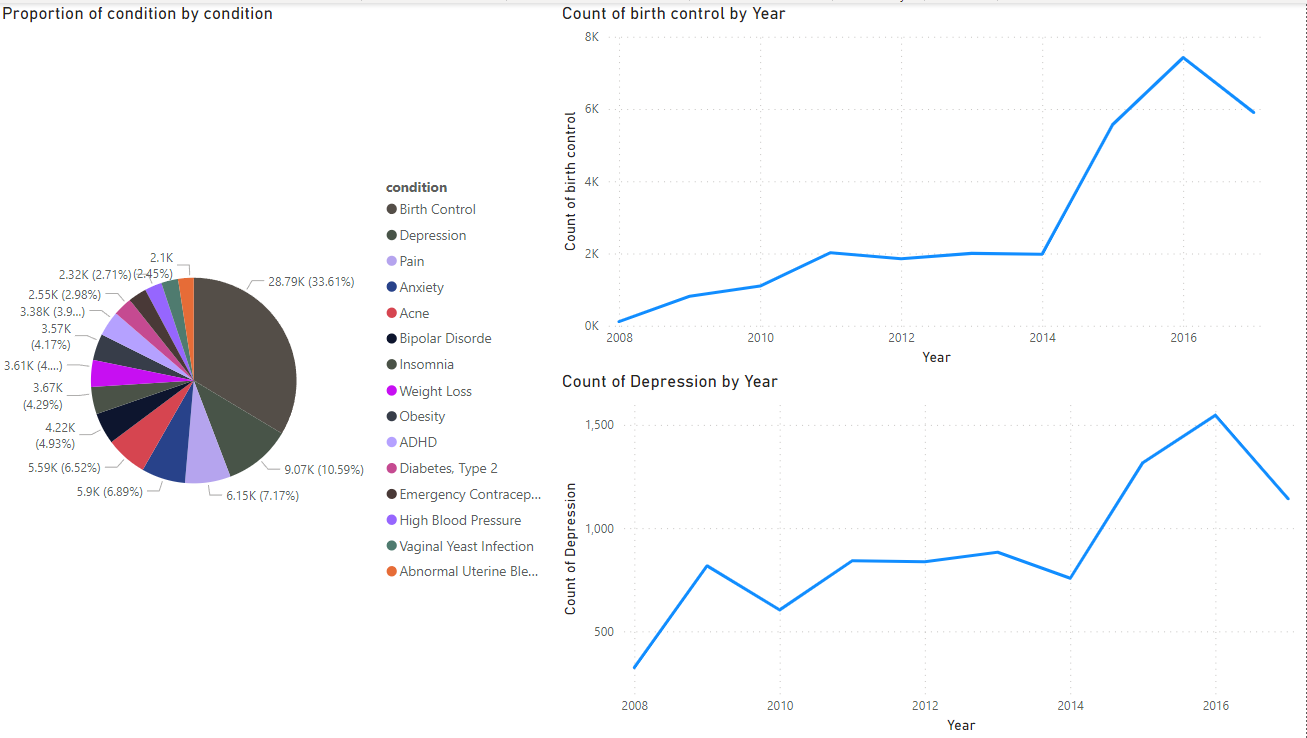

<b>Birth Control Most used drugs and their ratings for the year 2015</b>
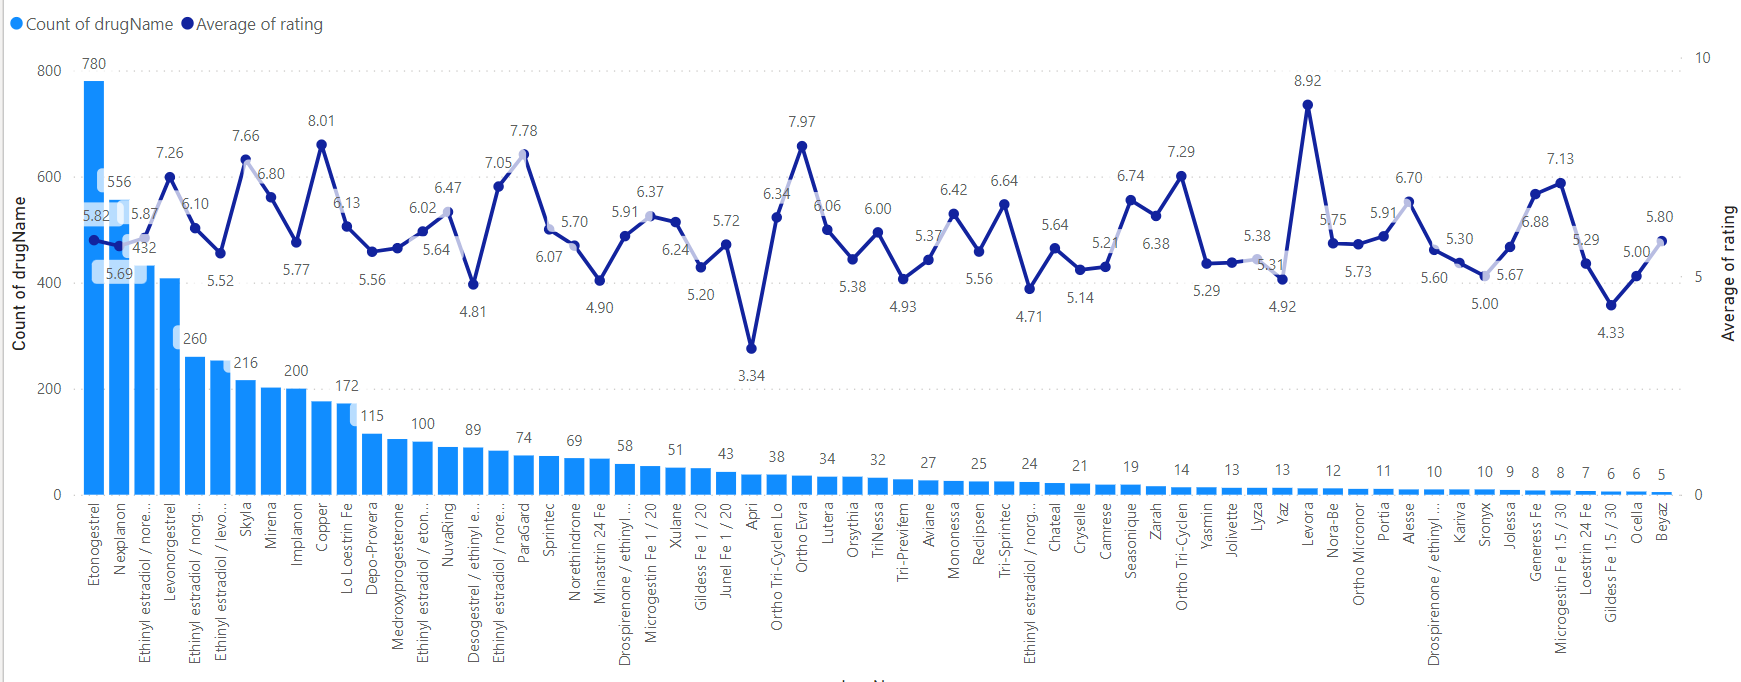
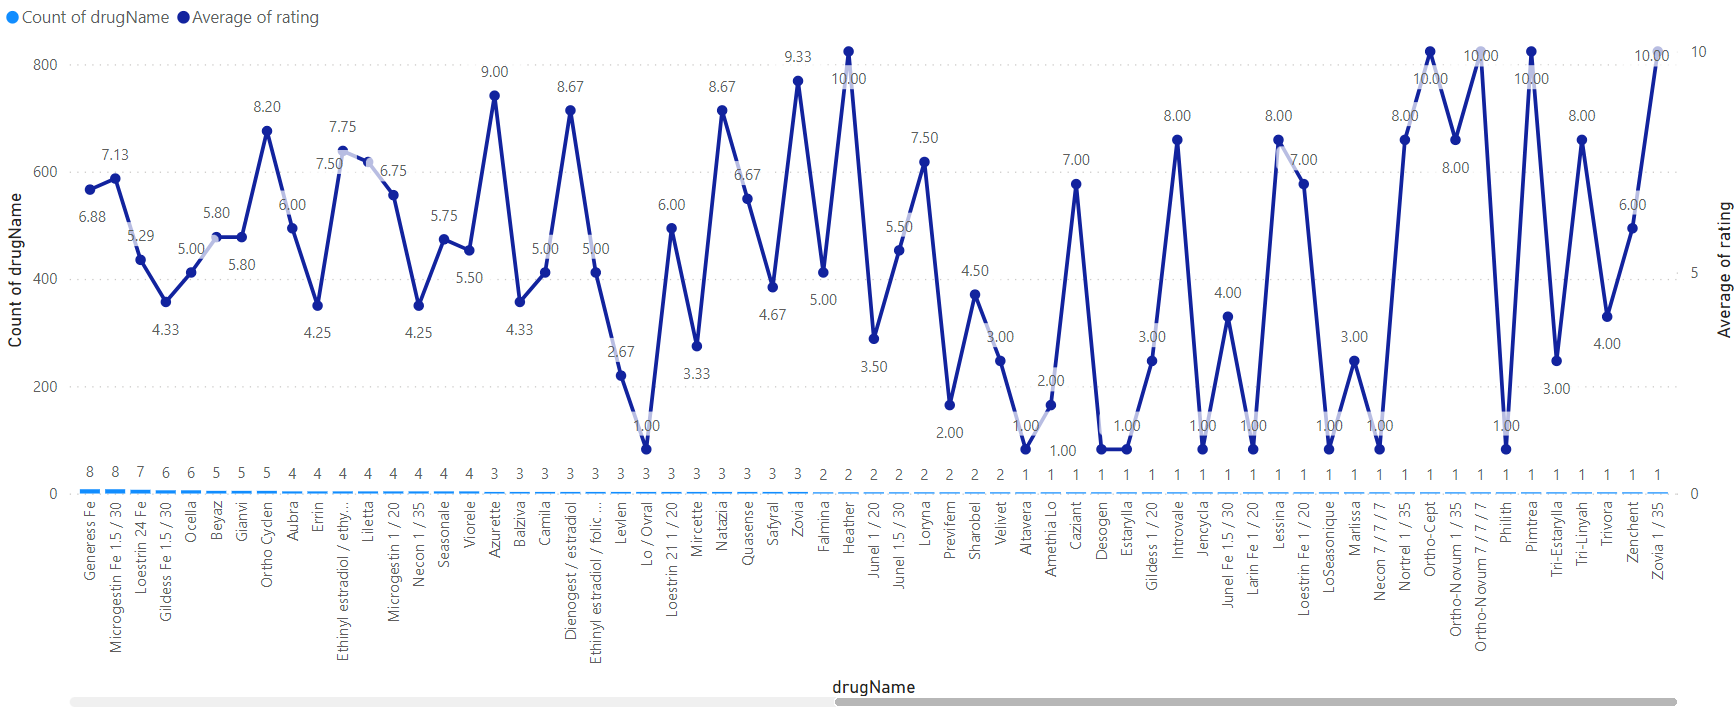

Birth Control Most used drugs and their ratings for the year 2016
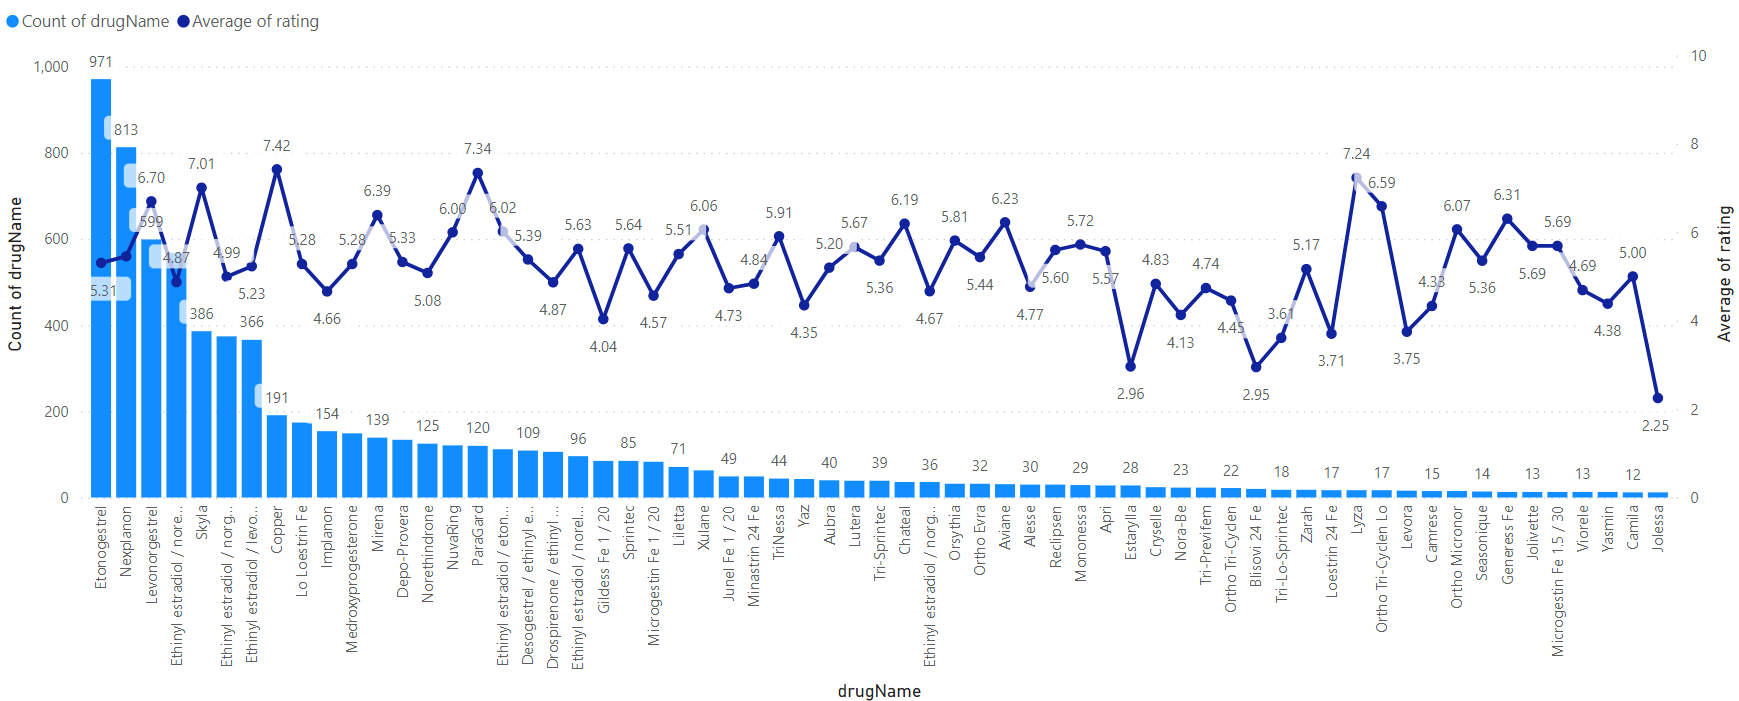
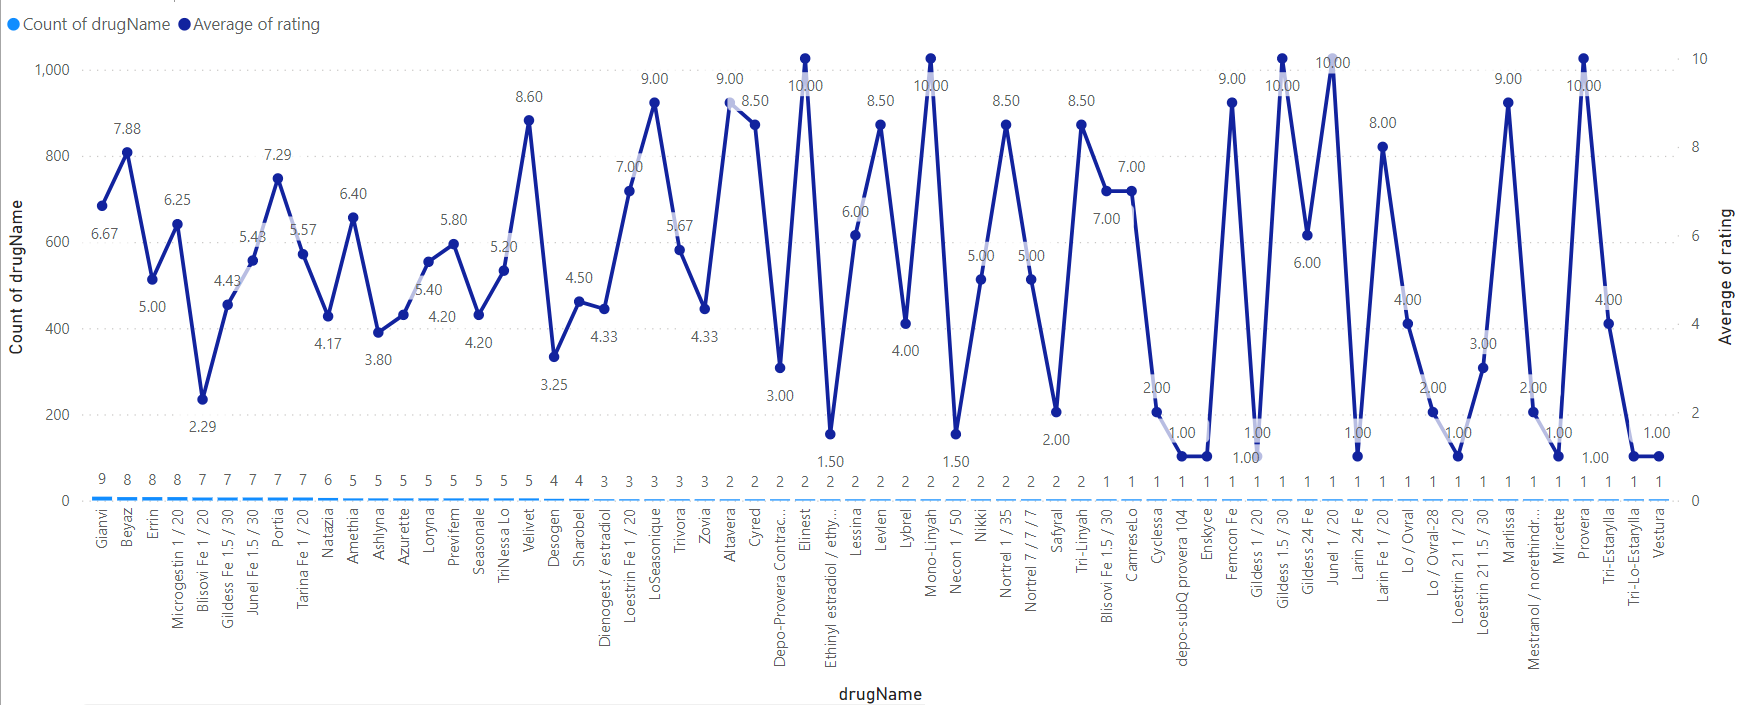

The Drug that has been used by people for Birth contol the most over the years is etonogestral
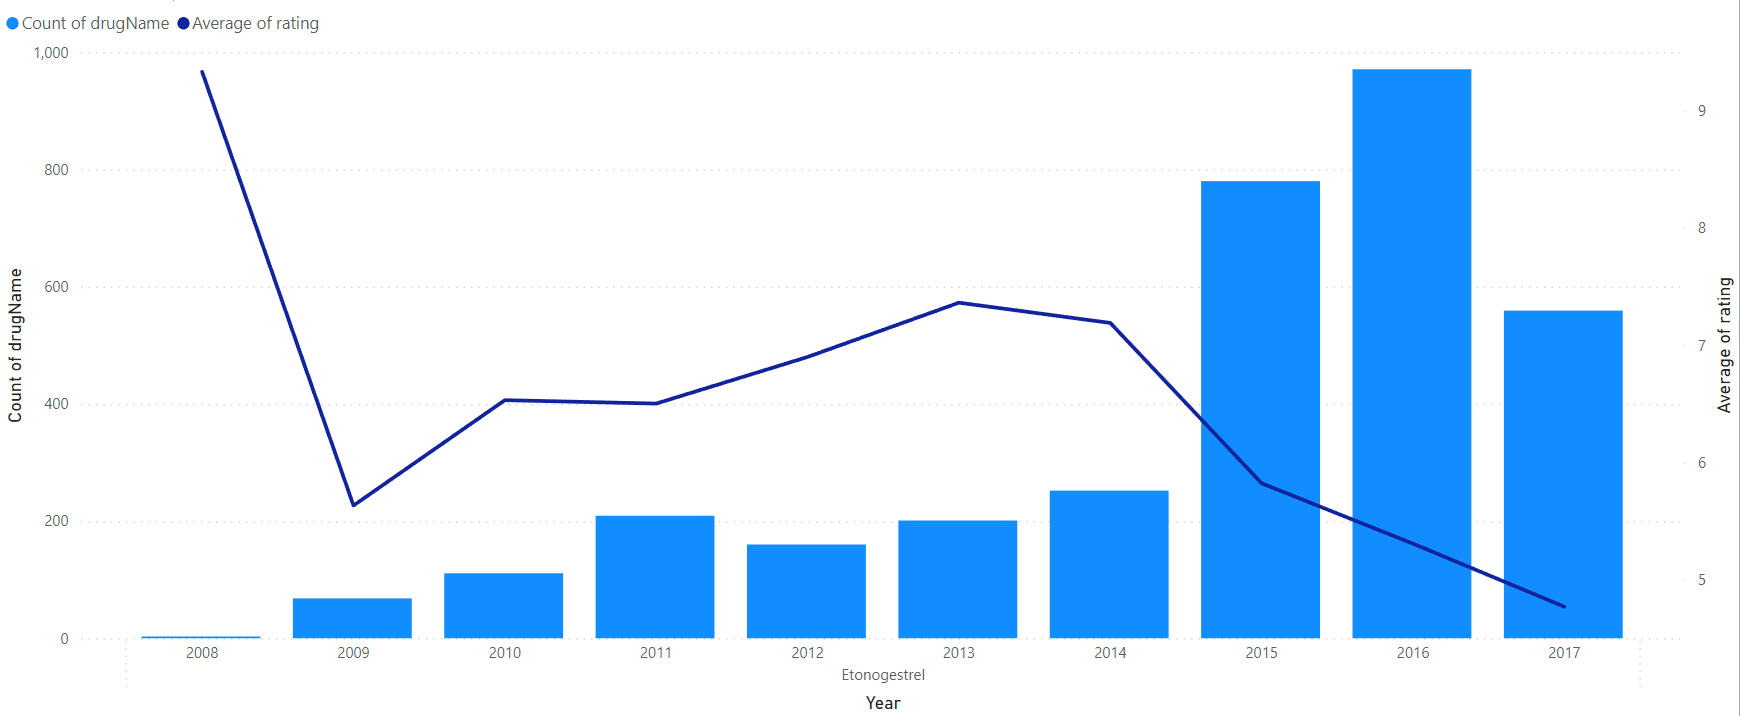

Ratings of drugs prescribed for birth control over the years
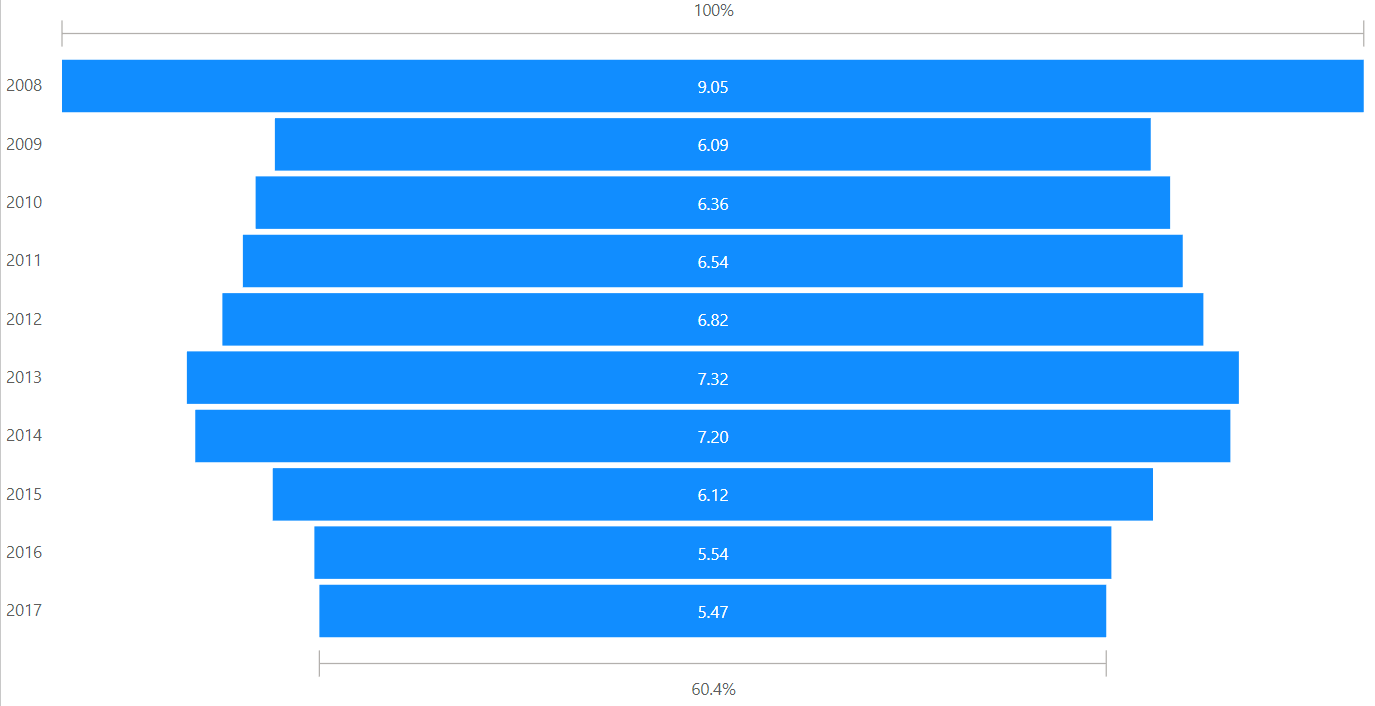

Birth Control prescribed drugs in year 2008
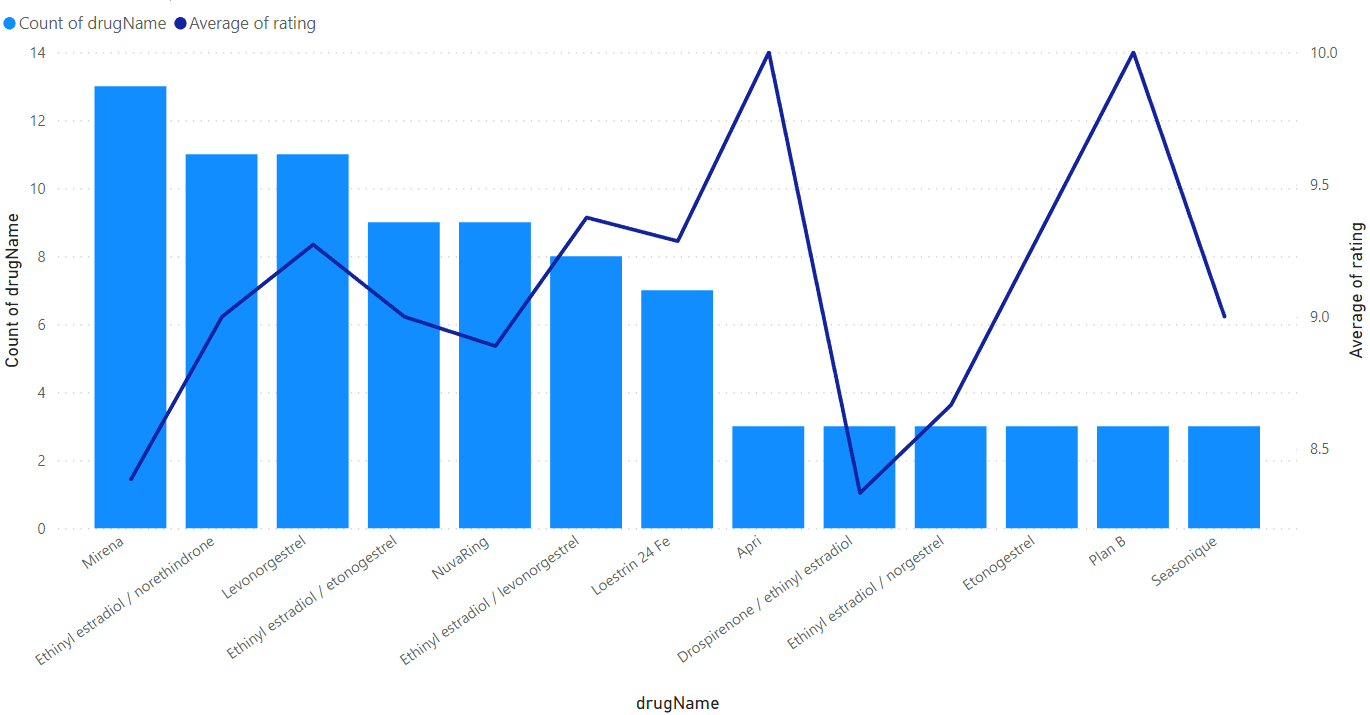

Highly rated Drug mirena for birth control over the years
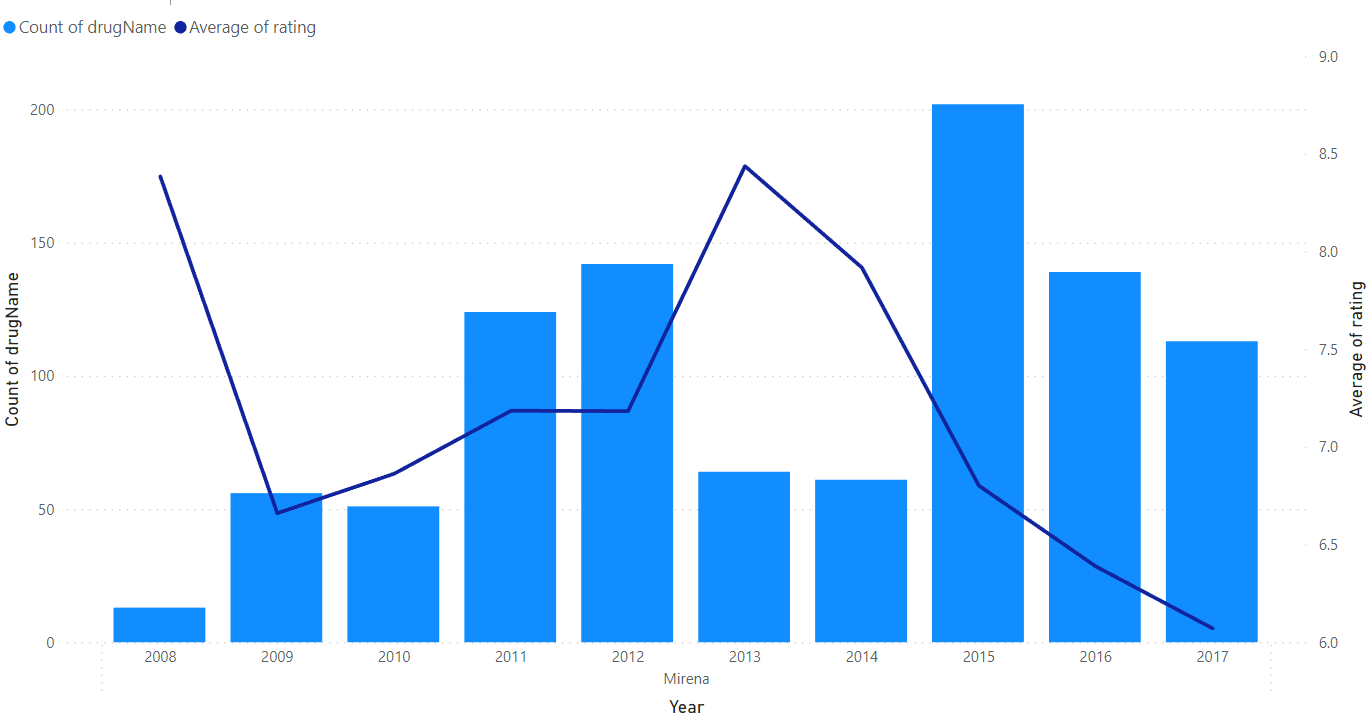

Best performing drug for birth control -> levenorgestral ( I Quadrant )
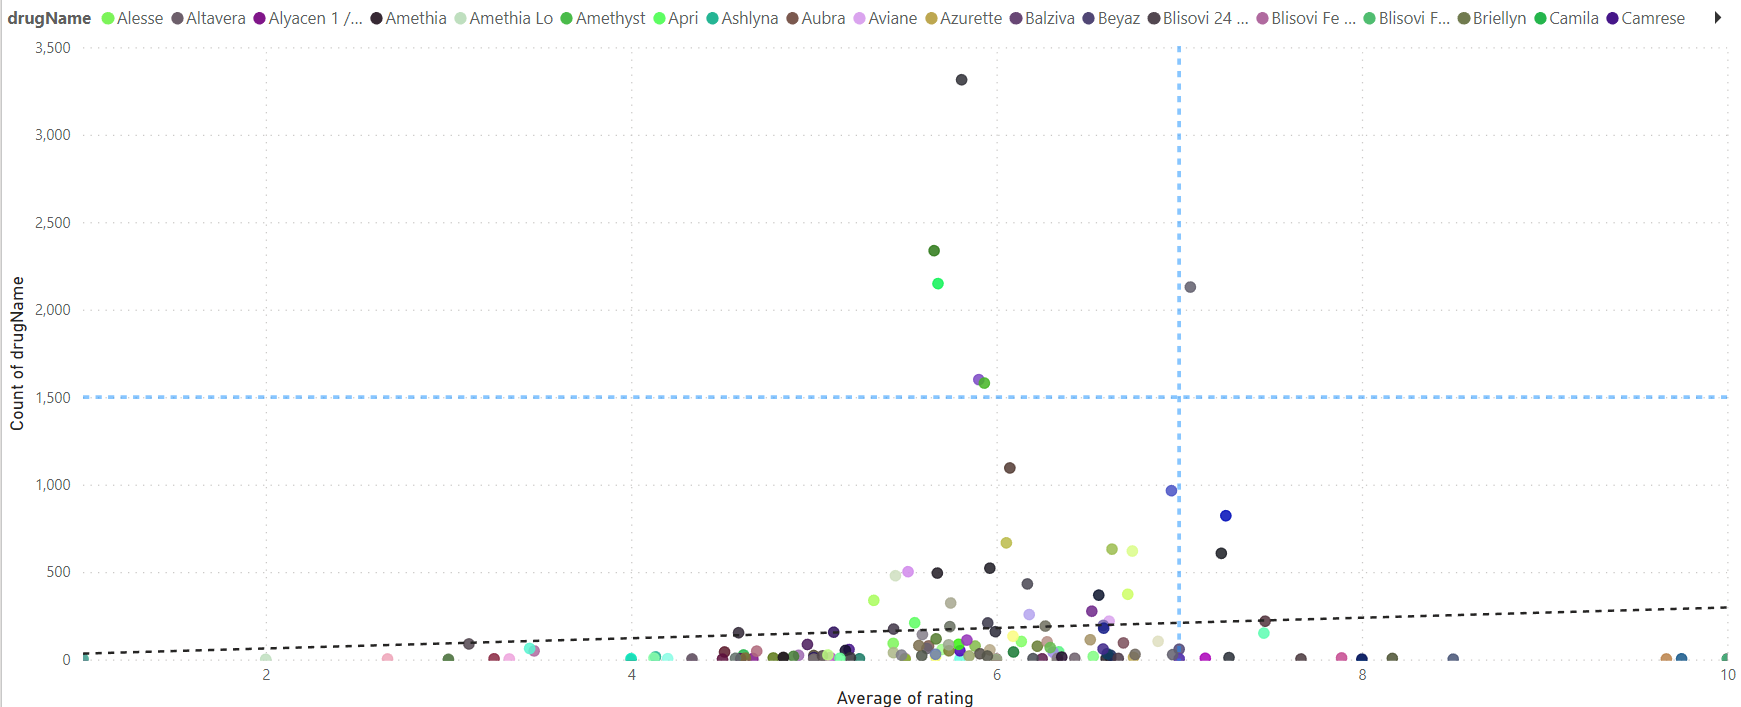

Count of drugs used over the years - > 2016 Highest
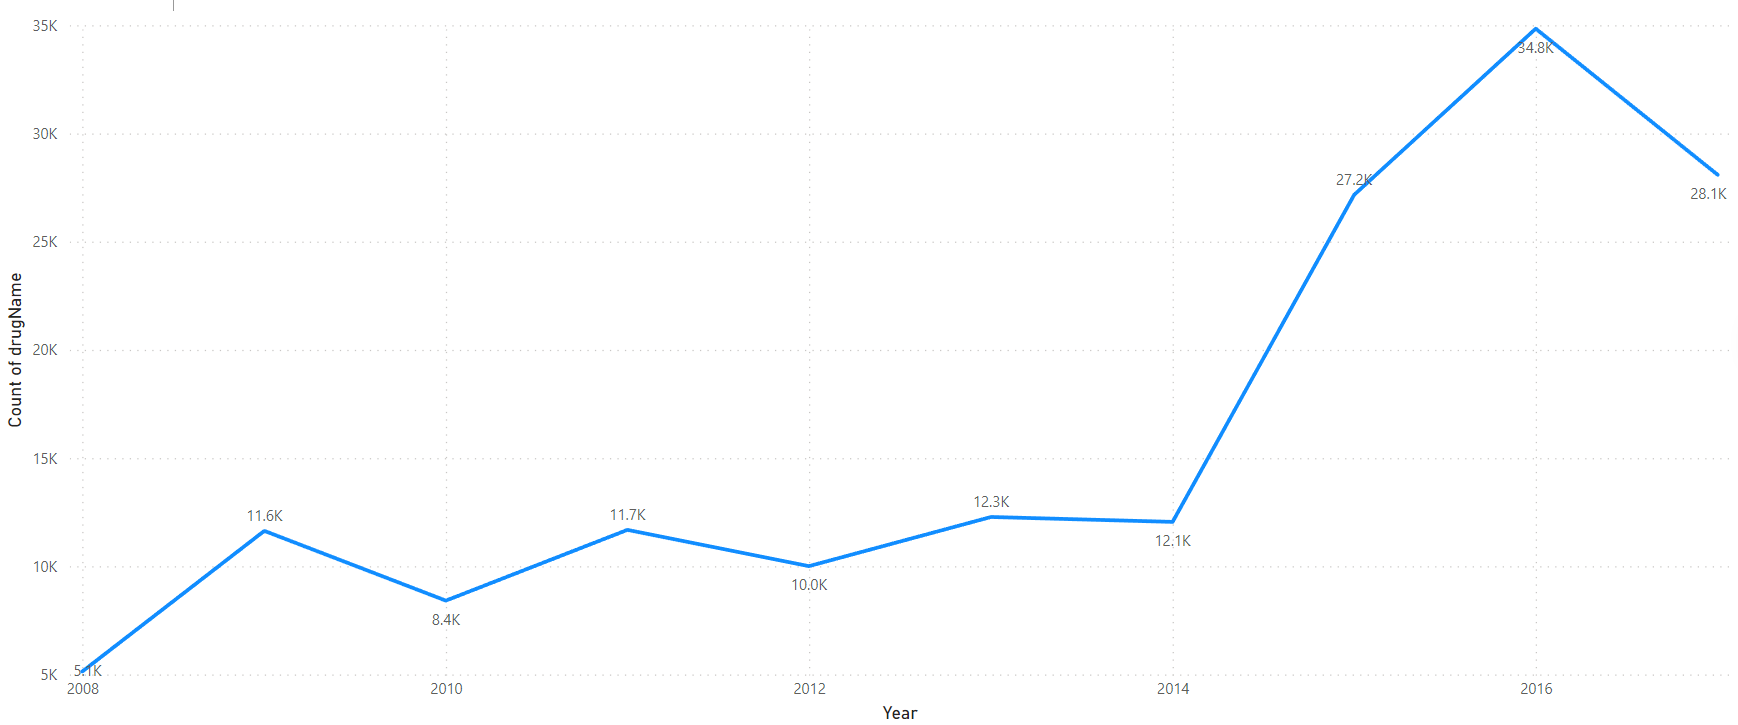

What Drug was used the most in 2016 and for what condition it is used
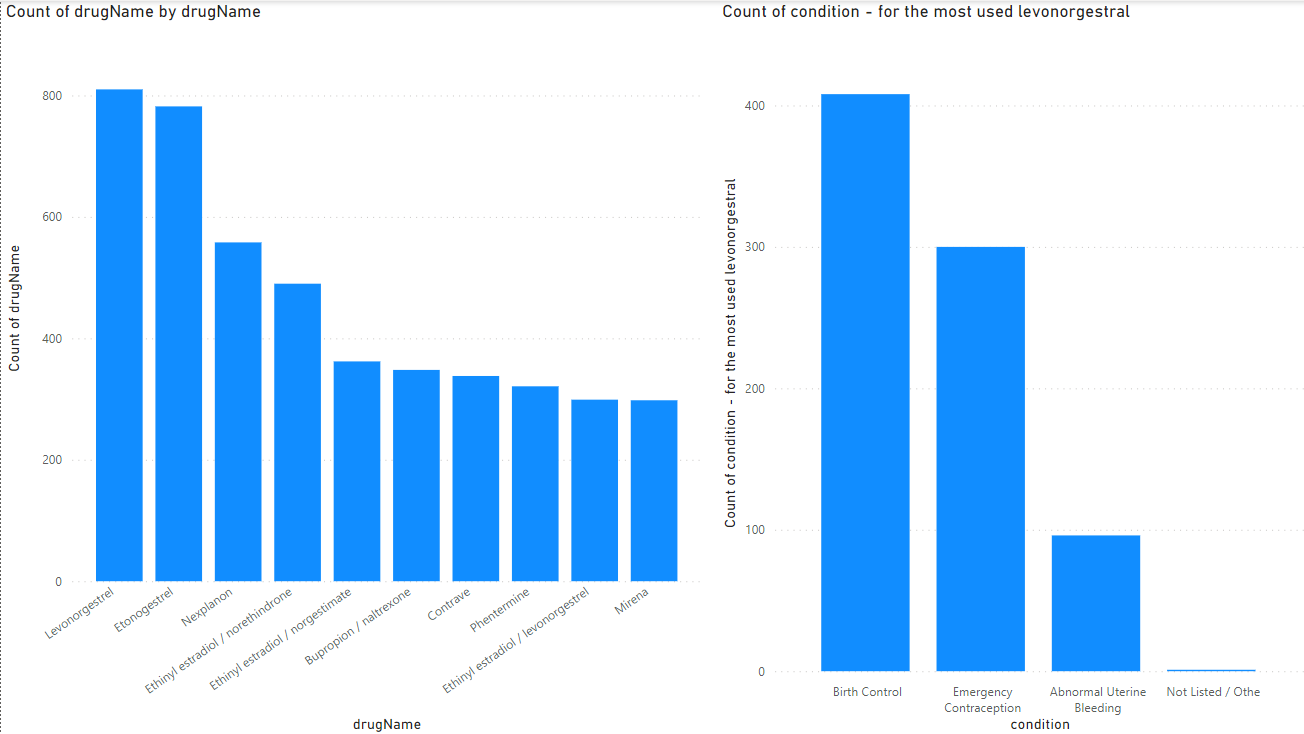

In [28]:
df_cleaned['review'] = df_cleaned['review'].fillna('none')

df_with_missing = df_cleaned[df_cleaned['condition'].isnull()].copy()
df_without_missing = df_cleaned[df_cleaned['condition'].notnull()]

X_train = df_without_missing.drop('condition', axis=1)
y_train = df_without_missing['condition']  

vectorizer = CountVectorizer() 
X_train_features = vectorizer.fit_transform(X_train['drugName']) 

X_test = df_with_missing.drop('condition', axis=1) 

model = MultinomialNB()
model.fit(X_train_features, y_train)

X_test_features = vectorizer.transform(X_test['drugName']) 
predicted_reviews = model.predict(X_test_features)

df_with_missing.loc[:, 'condition'] = predicted_reviews

df_filled = pd.concat([df_with_missing, df_without_missing])

df_filled.to_csv('drugs_ML.csv', index=False)

In [29]:
display(df_filled)
df_filled.info()

,uniqueID,drugName,condition,review,rating,date,usefulCount,reviewLength,year
30,51452,Azithromycin,Chlamydia Infection,veri good respons it is so use for me,10,2010-08-18,1,9,2010
105,220696,Loestrin 24 Fe,Birth Control,im and i have been on loestrin for about a wee...,3,2010-11-03,2,137,2010
148,61073,Urea,Depression,accur inform,10,2011-07-02,13,2,2011
196,67383,Provera,Birth Control,im year old and have alway had a pretti regula...,1,2016-03-27,4,142,2016
243,81588,Yaz,Birth Control,i took yaz for a littl over year from around t...,3,2010-06-01,3,111,2010
...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,i wrote my first report in midoctob of i have ...,10,2015-05-31,125,123,2015
161293,127085,Metoclopramide,Nausea/Vomiting,i wa given thi in iv befor surgey i immedi bec...,1,2011-11-01,34,48,2011
161294,187382,Orencia,Rheumatoid Arthritis,limit improv after month develop bad rash and ...,2,2014-03-15,35,13,2014
161295,47128,Thyroid desiccated,Underactive Thyroid,ive been on thyroid medic year i spent my firs...,10,2015-09-19,79,134,2015


<class 'pandas.core.frame.DataFrame'>
Int64Index: 161297 entries, 30 to 161296
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   uniqueID      161297 non-null  int64         
 1   drugName      161297 non-null  object        
 2   condition     161297 non-null  object        
 3   review        161297 non-null  object        
 4   rating        161297 non-null  int64         
 5   date          161297 non-null  datetime64[ns]
 6   usefulCount   161297 non-null  int64         
 7   reviewLength  161297 non-null  int64         
 8   year          161297 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 12.3+ MB


In [ ]:
# sample_df = df_cleaned.sample(n=161277, random_state=42)
# display(sample_df)
# sample_df.info()

In [ ]:
# sample_df_add = sample_df[['uniqueID','usefulCount','year']]
# sample_df_add

In [ ]:
# sample_df = sample_df.drop(['uniqueID','usefulCount','year'],axis=1)

In [ ]:
# sample_df['review'] = sample_df['review'].fillna('')

# train_df = sample_df.dropna(subset=['condition'])
# test_df = sample_df[sample_df['condition'].isnull()]

In [ ]:
# vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(train_df['review'])
# y_train = train_df['condition']

In [ ]:
# classifier = RandomForestClassifier()
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# classifier.fit(X_train, y_train)

# predicted_conditions = classifier.predict(vectorizer.transform(test_df['review']))
# sample_df.loc[sample_df['condition'].isnull(), 'condition'] = predicted_conditions

In [ ]:
# sample_df
# sample_df.info()

In [ ]:
# drugs = pd.merge(sample_df, sample_df_add, left_index=True, right_index=True)
# drugs